In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
#Load the Dataset
data = load_breast_cancer()

In [4]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [5]:
df["target"] = data.target

In [6]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
#Remove Constant Columns
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=constant_columns, inplace=True)

In [9]:
#Encode categorical features (there are no categorical features in this dataset)

In [10]:
#Feature scaling
#Use StandardScaler to scale numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [11]:
df_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,-1.297676
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,-1.297676
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,-1.297676
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,-1.297676
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,-1.297676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,-1.297676
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,-1.297676
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,-1.297676
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,-1.297676


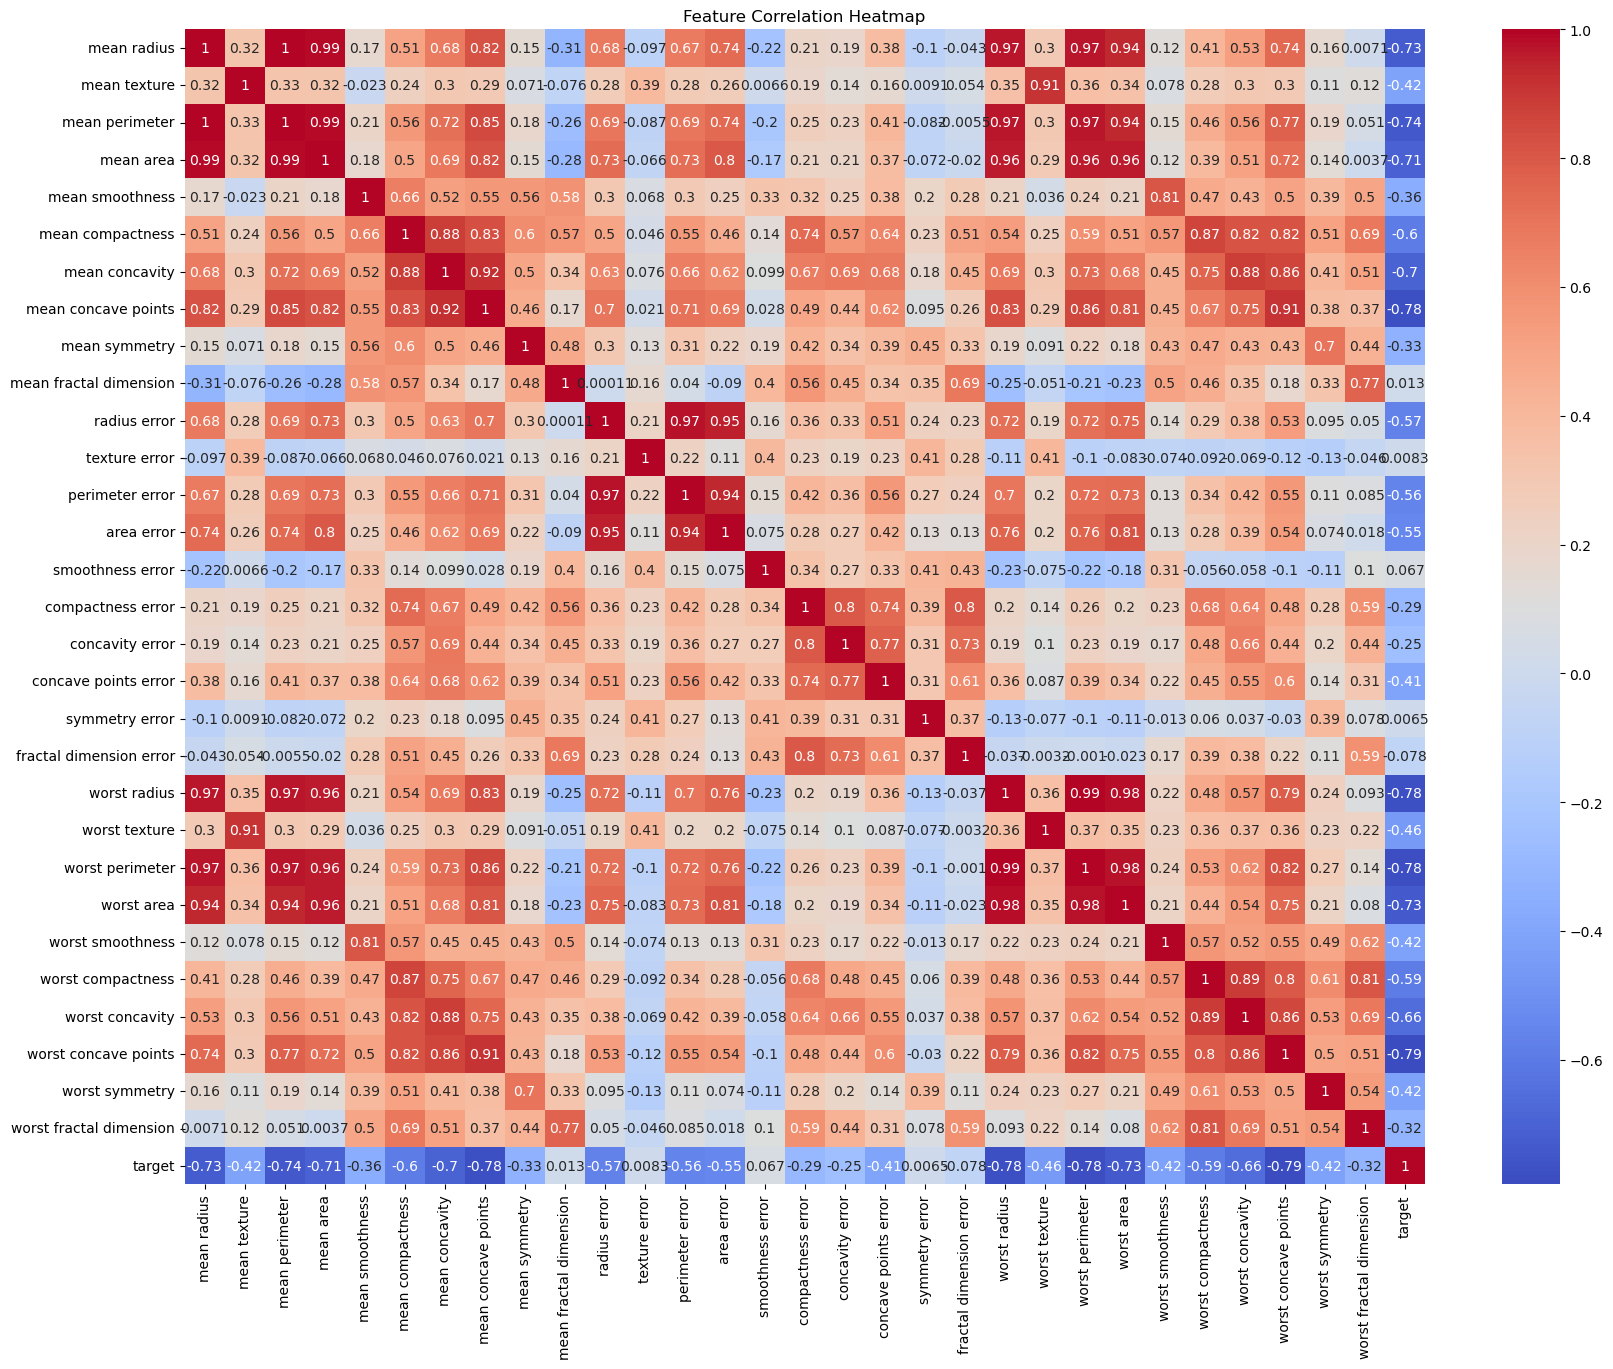

In [12]:
#Correlation analysis
#Calculate the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [13]:
#Identify and remove highly correlated features
threshold = 0.8
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range (i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname= correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

In [14]:
df.drop(columns=highly_correlated_features, inplace=True)

In [15]:
df

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concave points error,symmetry error,worst symmetry,target
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601,0
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750,0
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613,0
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.6638,0
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.02454,0.01114,0.2060,0
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01678,0.01898,0.2572,0
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01557,0.01318,0.2218,0
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.01664,0.02324,0.4087,0


In [16]:
#Feature selection
#Use SelectKBest with the chi-squared (chi2) statistic as the scoring function.

In [17]:
x = df.drop("target",axis=1)

In [18]:
y = df["target"]

In [19]:
x

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concave points error,symmetry error,worst symmetry
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.6638
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.02454,0.01114,0.2060
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01678,0.01898,0.2572
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01557,0.01318,0.2218
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.01664,0.02324,0.4087


In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [21]:
selector = SelectKBest(score_func = chi2, k =10)

In [22]:
x_new = selector.fit_transform(x,y)

In [23]:
selected_features = x.columns[selector.get_support()]

In [24]:
df_selected = pd.concat([pd.DataFrame(x_new, columns=selected_features), df['target']], axis=1)

In [25]:
df_selected

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,radius error,texture error,compactness error,concave points error,worst symmetry,target
0,17.99,10.38,0.11840,0.27760,0.2419,1.0950,0.9053,0.04904,0.01587,0.4601,0
1,20.57,17.77,0.08474,0.07864,0.1812,0.5435,0.7339,0.01308,0.01340,0.2750,0
2,19.69,21.25,0.10960,0.15990,0.2069,0.7456,0.7869,0.04006,0.02058,0.3613,0
3,11.42,20.38,0.14250,0.28390,0.2597,0.4956,1.1560,0.07458,0.01867,0.6638,0
4,20.29,14.34,0.10030,0.13280,0.1809,0.7572,0.7813,0.02461,0.01885,0.2364,0
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,1.1760,1.2560,0.02891,0.02454,0.2060,0
565,20.13,28.25,0.09780,0.10340,0.1752,0.7655,2.4630,0.02423,0.01678,0.2572,0
566,16.60,28.08,0.08455,0.10230,0.1590,0.4564,1.0750,0.03731,0.01557,0.2218,0
567,20.60,29.33,0.11780,0.27700,0.2397,0.7260,1.5950,0.06158,0.01664,0.4087,0


In [26]:
#Split the data into train and test sets for model training and evaluation
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

In [27]:
#Train a simple classifier to evaluate feature selection
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with selected features:", accuracy)

Accuracy with selected features: 0.956140350877193


## Bonus

In [28]:
from sklearn.datasets import load_iris

In [29]:
#Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [30]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [31]:
#Feature Scaling
scaler = StandardScaler()
iris_df[iris_df.columns[:-1]] = scaler.fit_transform(iris_df[iris_df.columns[:-1]])

In [32]:
#Remove constant columns (for creativity, let's assume constant columns are columns with a standard deviation below a threshold)
std_dev_threshold = 0.1
constant_columns = [col for col in iris_df.columns[:-1] if iris_df[col].std() < std_dev_threshold]
iris_df.drop(columns=constant_columns, inplace=True)

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif

In [34]:
#Feature Selection using SelectKBest
X_iris = iris_df.drop('target', axis=1)
y_iris = iris_df['target']

k_best_selector = SelectKBest(score_func=f_classif, k=2)  # Keep only 2 best features
X_iris_selected = k_best_selector.fit_transform(X_iris, y_iris)

In [35]:
#Get the selected feature names
selected_feature_names_iris = X_iris.columns[k_best_selector.get_support()]

In [36]:
iris_selected = pd.concat([pd.DataFrame(X_iris_selected, columns=selected_feature_names_iris), df['target']], axis=1)

In [37]:
iris_selected

,petal length (cm),petal width (cm),target
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0
...,...,...,...
564,NaN,NaN,0
565,NaN,NaN,0
566,NaN,NaN,0
567,NaN,NaN,0


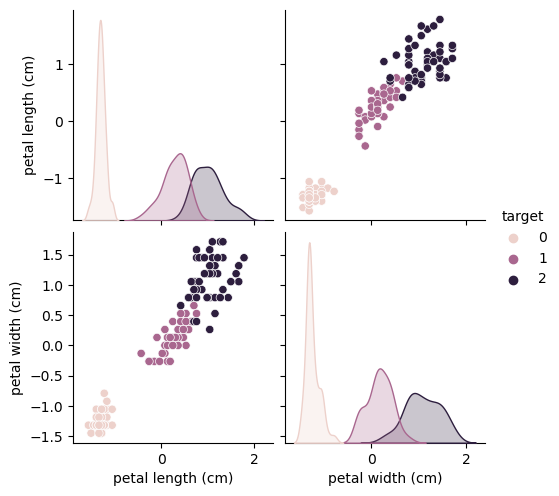

In [38]:
#Plot a pairplot to visualize the selected features
sns.pairplot(iris_df[selected_feature_names_iris.tolist() + ['target']], hue='target')
plt.show()